In [2]:
!pip install opencv-python

     |████████████████████████████████| 28.7MB 243kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import cv2

# Para ocupar opencv

In [5]:
camera = cv2.VideoCapture(0)
for i in range(100):
    return_value, image = camera.read()
    cv2.imwrite('images/opencv'+str(i)+'.png', image)
del(camera)

In [3]:
%matplotlib inline # if you are running this code in jupyter notebook

UsageError: unrecognized arguments: # if you are running this code in jupyter notebook


In [5]:
import numpy as np
from scipy import signal as sg
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread("/home/dramon/images/opencv29.png") # reads image as BGR

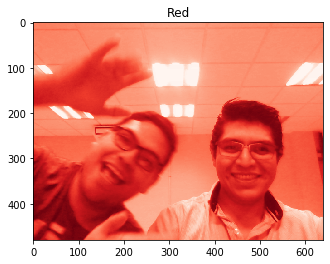

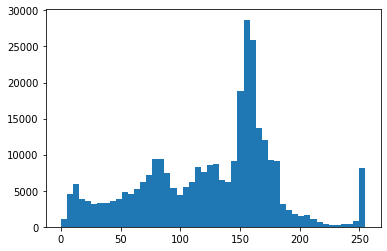

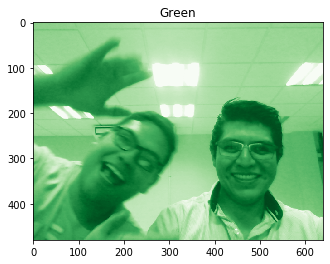

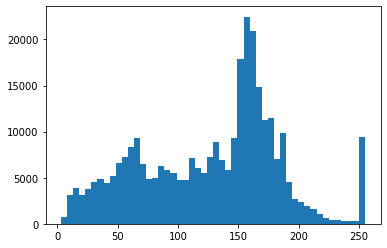

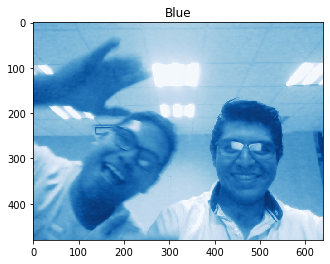

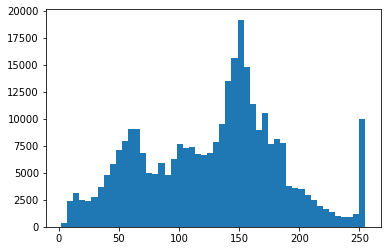

In [7]:
plt.figure()
plt.imshow(img[:, :, 2], cmap="Reds_r")
plt.title("Red")
plt.figure()
plt.hist(img[:, :, 2].ravel(), bins=50)
plt.figure()
plt.imshow(img[:, :, 1], cmap="Greens_r")
plt.title("Green")
plt.figure()
plt.hist(img[:, :, 1].ravel(), bins=50)
plt.figure()
plt.imshow(img[:, :, 0], cmap=plt.cm.Blues_r)
plt.title("Blue")
plt.figure()
plt.hist(img[:, :, 0].ravel(), bins=50)
plt.show()

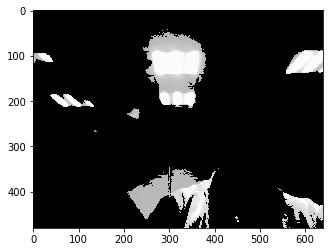

In [5]:
mask = img[:, :, 2] > 175
plt.imshow(img[:, :, 0]*mask, cmap=plt.cm.gray)
plt.show()

In [13]:
img = cv2.imread("/home/dramon/images/opencv29.png", 0) # reads image as grayscale

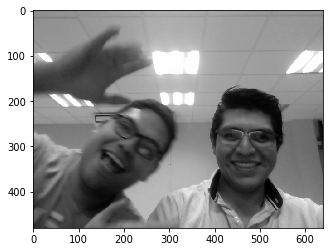

In [14]:
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

Convolución
$$\int_{-\inf}^{\inf} f(t-\tau)h(\tau) d\tau$$

Correlación
$$\int_{-\inf}^{\inf} f(t+\tau)h(\tau) d\tau$$

# Convolucion

/home/dramon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/home/dramon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/dramon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This s

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
 [5. 4. 2. 1. 0. 0. 0. 0. 0. 0.]
 [0. 5. 4. 2. 1. 0. 0. 0. 0. 0.]
 [0. 0. 5. 4. 2. 1. 0. 0. 0. 0.]
 [0. 0. 0. 5. 4. 2. 1. 0. 0. 0.]
 [0. 0. 0. 0. 5. 4. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0. 5. 4. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0. 5. 4. 2. 1.]
 [0. 0. 0. 0. 0. 0. 0. 5. 4. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 5. 4.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]


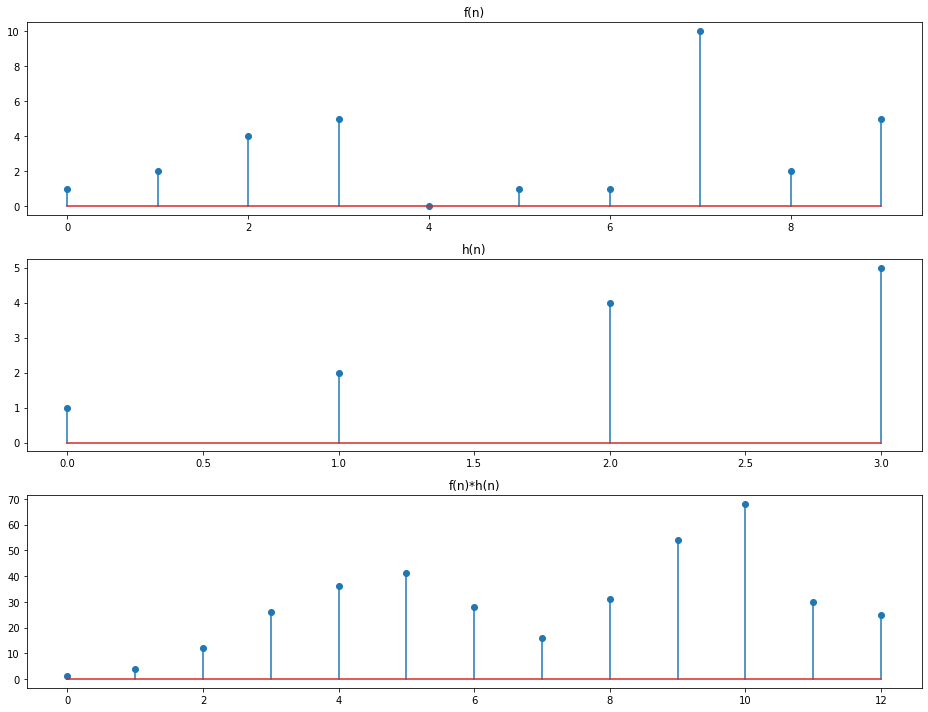

In [8]:
def conv1d(fl, kl):
    m = len(fl)
    n = len(kl)
    filtermat = np.zeros((m+n-1, m))
    for c in range(m):
        filtermat[c:n+c,c] = kl
    print(filtermat)
    convolucion = np.matmul(filtermat, fl)
    return convolucion

f = [1, 2, 4, 5, 0,1, 1, 10, 2, 5]
h = [1,2,4,5]
plt.figure(figsize=(13,10))
plt.subplot(3,1,1)
plt.stem(f)
plt.title("f(n)")
plt.subplot(3,1,2)
plt.stem(h)
plt.title("h(n)")
plt.subplot(3,1,3)
plt.stem(conv1d(f, h))
plt.title("f(n)*h(n)")
plt.tight_layout()

# Convolucion en 2d

Dadas la matrices de a continuacion:

$$\frac{1}{9} \left[\begin{matrix}1 & 1 & 1 \\1 & 1 & 1\\1 & 1 & 1\end{matrix}\right]$$

$$\frac{1}{25} \left[\begin{matrix}1 & 1 & 1 & 1 & 1 \\1 & 1 & 1 & 1 & 1\\1 & 1 & 1 & 1 & 1\\1 & 1 & 1 & 1 & 1\end{matrix}\right]$$

$$\frac{1}{16} \left[\begin{matrix}1 & 2 & 1 \\2 & 4 & 2\\1 & 2 & 1\end{matrix}\right]$$

hacer la convolucion de las matrices con la matriz imagen y evaluar los resultados

In [10]:
kernel = np.ones(shape=(3,3), dtype=float) * (1/9)

In [11]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

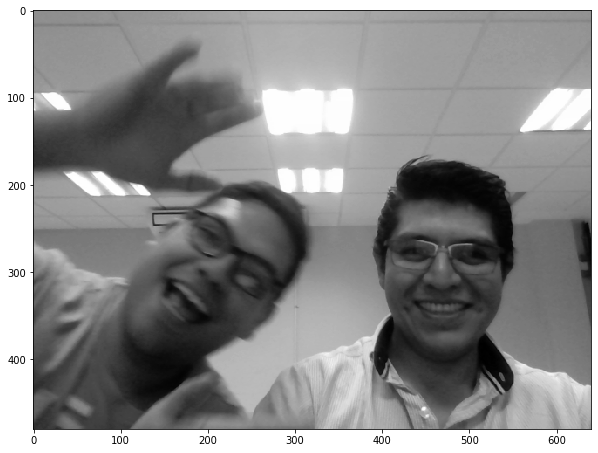

In [15]:
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap=plt.cm.gray)

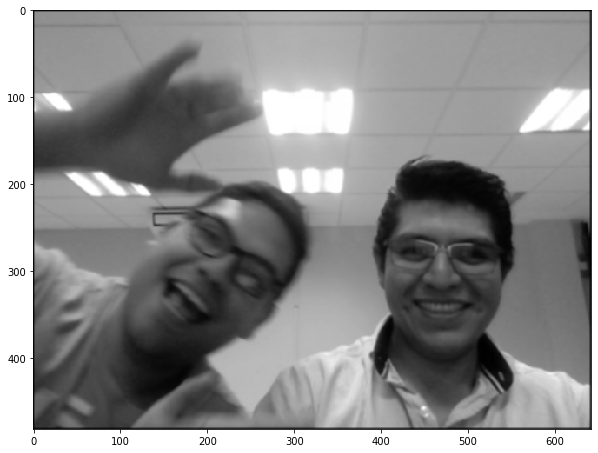

In [16]:
plt.figure(figsize=(10, 10))
plt.imshow(sg.convolve2d(img, kernel), cmap=plt.cm.gray)

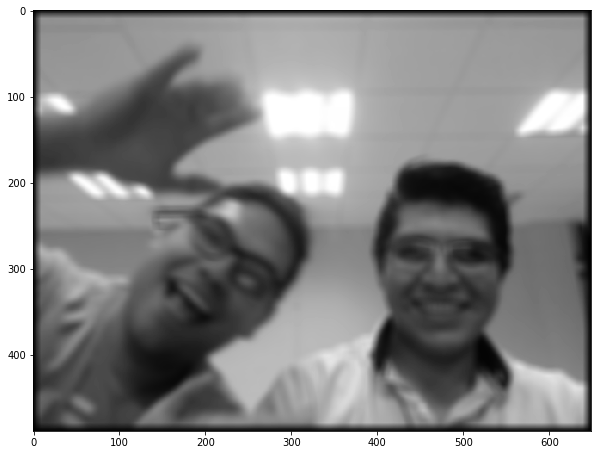

In [17]:
kernel2 = np.ones(shape=(10, 10), dtype=float) * (1/100)
plt.figure(figsize=(10, 10))
plt.imshow(sg.convolve2d(img, kernel2), cmap=plt.cm.gray)

In [22]:
kernel3 = np.array([1,2,1,2,4,2,1,2,1]).reshape(3,-1)*(1/16)
kernel3

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

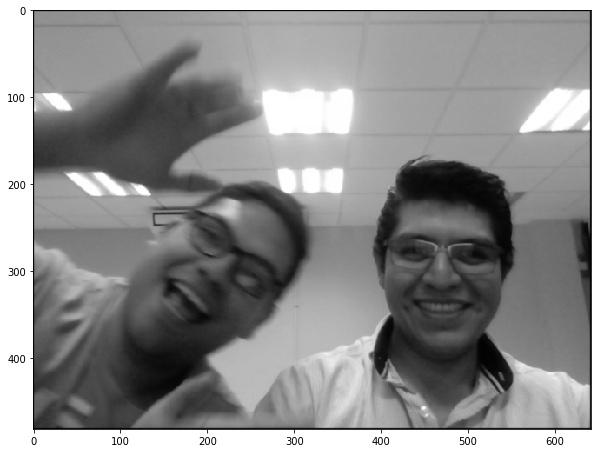

In [21]:
plt.figure(figsize=(10, 10))
plt.imshow(sg.convolve2d(img, kernel3), cmap=plt.cm.gray)

$$\left[\begin{matrix}1 & 2 & 1 \\0 & 0 & 0\\1 & 2 & 1\end{matrix}\right]$$

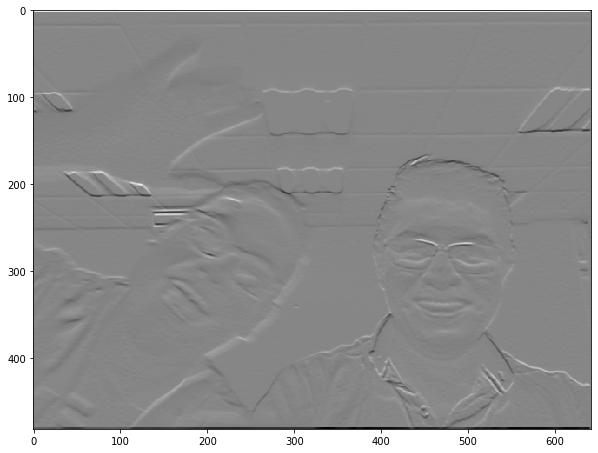

In [34]:
kernel4 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=float)
plt.figure(figsize=(10, 10))
reshorizontal = sg.convolve2d(img, kernel4)
plt.imshow(reshorizontal, cmap=plt.cm.gray)
plt.show()

$$\left[\begin{matrix}1 & 0 & -1 \\2 & 0 & -2\\1 & 0 & -1\end{matrix}\right]$$

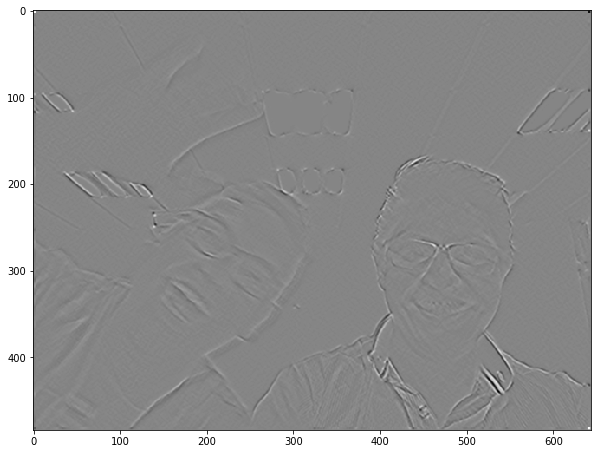

In [35]:
kernel5 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=float)
plt.figure(figsize=(10, 10))
plt.imshow(sg.convolve2d(reshorizontal, kernel5), cmap=plt.cm.gray)
plt.show()

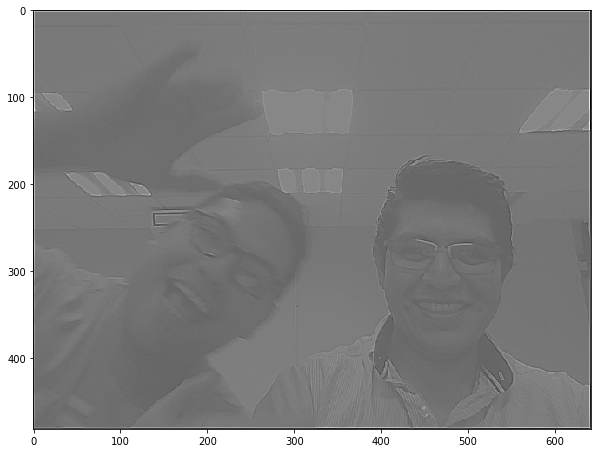

In [33]:
kernel6 = np.array([-1, -1, -1, -1,  9, -1, -1, -1, -1], dtype=float).reshape((3,-1))
plt.figure(figsize=(10, 10))
plt.imshow(sg.convolve2d(img, kernel6), cmap=plt.cm.gray)
plt.show()

cv2.imshow("Lotus", sg.convolve2d(img, kernel3).astype(np.int8))

# Transformaciones

## Transformacion affine

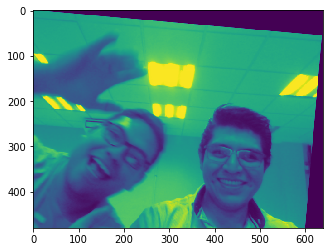

In [80]:
angle = 5
theta = (angle*np.pi)/180
rotacion = np.array([[np.cos(theta), -np.sin(theta) , 0], [np.sin(theta), np.cos(theta), 0]], dtype=np.float32)
img_rotation=cv2.warpAffine(img,rotacion,(img.shape[1], img.shape[0]))
plt.imshow(img_rotation)

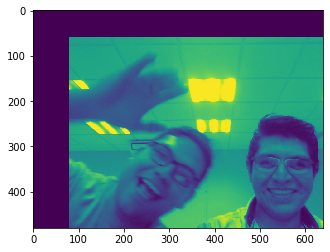

In [81]:
height,width = img.shape[:2]
quarter_width, quarter_height = (width/8, height/8)
T = np.float32([[1, 0,quarter_width],[0,1,quarter_height]])
img_traslated = cv2.warpAffine(img, T,(img.shape[1], img.shape[0]))
plt.imshow(img_traslated)

In [ ]:
filterarray = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

In [16]:
filterarray = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

In [11]:
from scipy import signal as sg

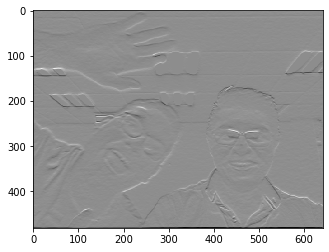

In [18]:
plt.imshow(sg.convolve(filterarray, img[:,:,0]), cmap="gray")

# Sobre filtros

- https://lodev.org/cgtutor/filtering.html
- https://www.opencv-srf.com/2018/01/filter-images-and-videos.html
- http://juanreyero.com/article/python/python-convolution.html
- https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/

# Scikit Image

- https://scikit-image.org/docs/stable/auto_examples/index.html

# OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- Para instalar: https://pypi.org/project/opencv-python/